<a href="https://colab.research.google.com/github/pran9v/CheatSheets-for-Developers/blob/main/objectreco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install tensorflow keras opencv-python matplotlib

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import tarfile

# Path to the dataset on Google Drive
dataset_path = '/content/drive/MyDrive/cifar-10-python.tar.gz'

# Extract the dataset
with tarfile.open(dataset_path, 'r:gz') as tar:
    tar.extractall(path='/content')

In [12]:
!ls

sample_data


In [16]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values

print(f"Training data shape: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}, Labels: {y_test.shape}")

Training data shape: (50000, 32, 32, 3), Labels: (50000, 1)
Testing data shape: (10000, 32, 32, 3), Labels: (10000, 1)


In [17]:
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3446 - loss: 1.7750 - val_accuracy: 0.5339 - val_loss: 1.3009
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5622 - loss: 1.2285 - val_accuracy: 0.5954 - val_loss: 1.1430
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6236 - loss: 1.0785 - val_accuracy: 0.6364 - val_loss: 1.0354
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6618 - loss: 0.9591 - val_accuracy: 0.6496 - val_loss: 1.0029
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6873 - loss: 0.8945 - val_accuracy: 0.6725 - val_loss: 0.9501
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7057 - loss: 0.8370 - val_accuracy: 0.6789 - val_loss: 0.9225
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7287 - loss: 0.7752 - val_accuracy: 0.7025 - val_loss: 0.8699
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7393 - loss: 0.7435 -

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 0s - 2ms/step - accuracy: 0.6942 - loss: 0.9077
Test accuracy: 0.6941999793052673


In [20]:
model.save("cifar10_cnn_model.h5")

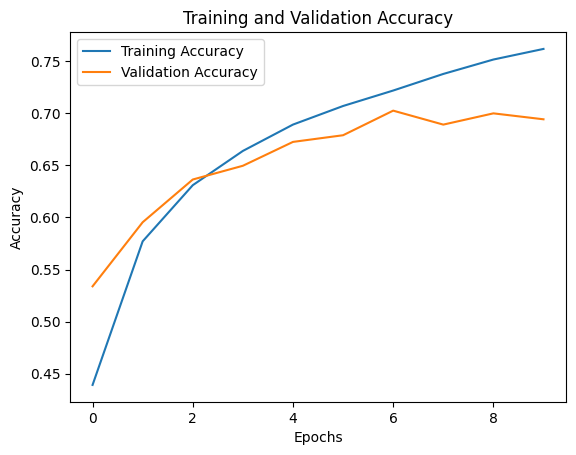

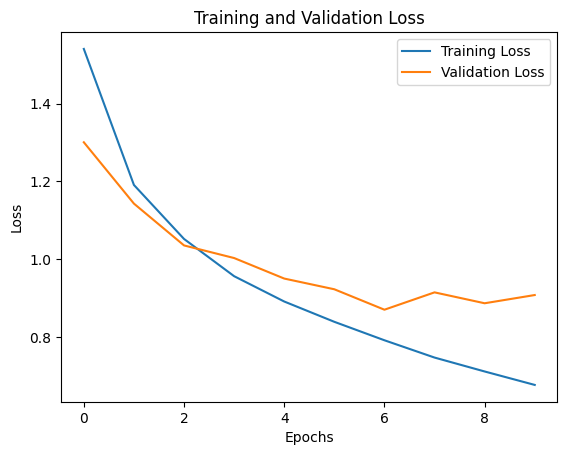

In [21]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


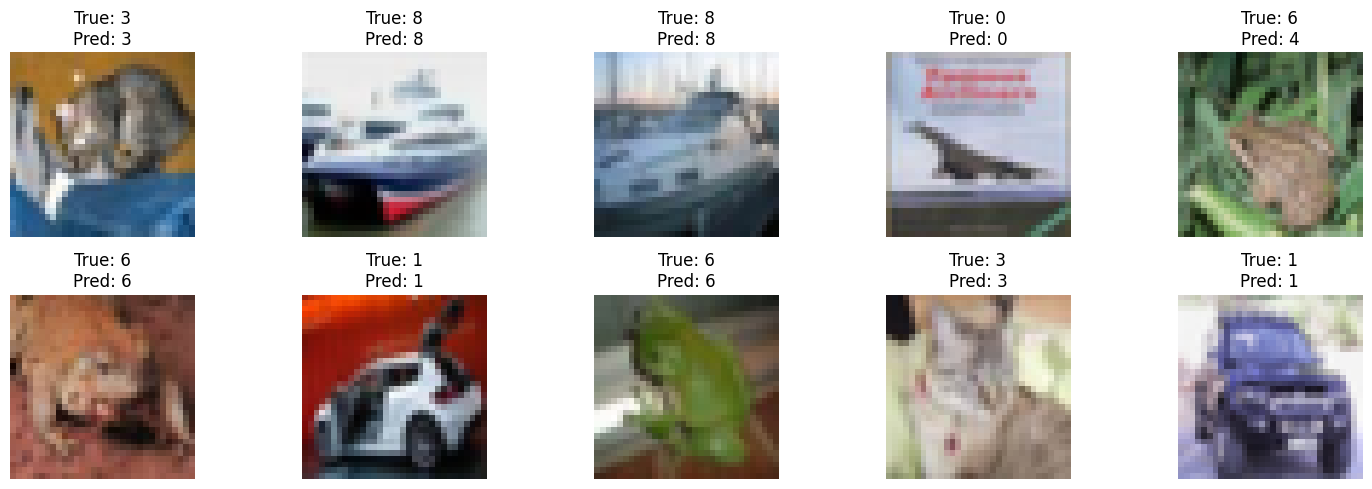

In [22]:
import numpy as np

# Get predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)  # Get class with highest probability
true_classes = y_test.flatten()  # True labels

# Plot some sample test images with predictions
num_images = 10  # Number of images to display
plt.figure(figsize=(15, 5))

for i in range(num_images):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(f"True: {true_classes[i]}\nPred: {predicted_classes[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

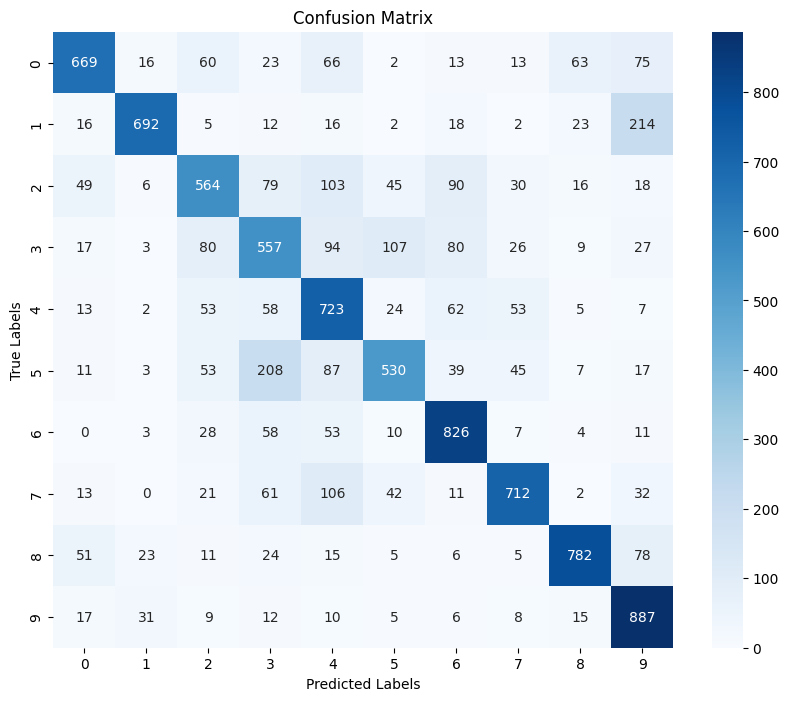

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

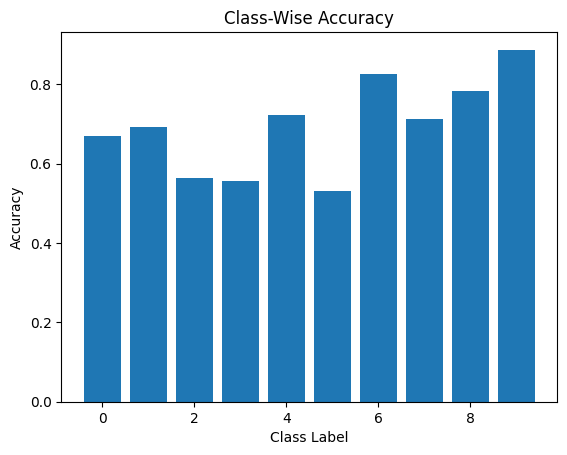

In [24]:
class_accuracy = cm.diagonal() / cm.sum(axis=1)

# Plot class-wise accuracy
plt.bar(range(10), class_accuracy)
plt.xlabel('Class Label')
plt.ylabel('Accuracy')
plt.title('Class-Wise Accuracy')
plt.show()

In [25]:
from tensorflow.keras.datasets import cifar10

# Load only the test data
(_, _), (x_test, y_test) = cifar10.load_data()

# Normalize the test data
x_test = x_test / 255.0

print(f"Test data shape: {x_test.shape}")

Test data shape: (10000, 32, 32, 3)


In [26]:
predictions = model.predict(x_test)

# Get the predicted class for each image (most probable class)
predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [27]:
# Compare true labels and predicted labels
accuracy = np.mean(predicted_classes == y_test.flatten())  # Flatten y_test for comparison
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 69.42%


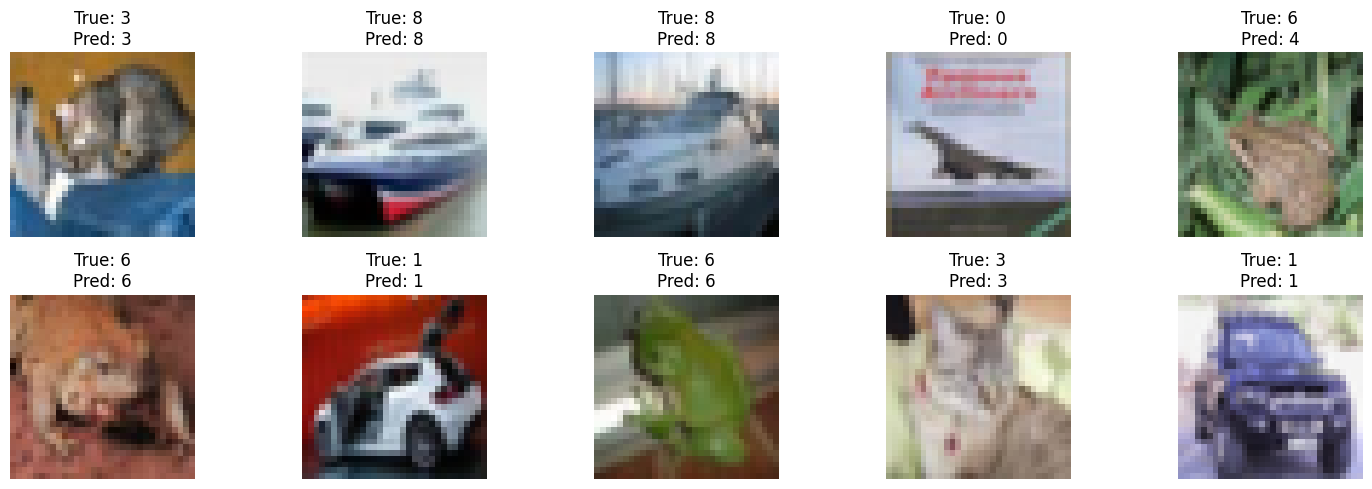

In [28]:
import matplotlib.pyplot as plt

# Visualize the first 10 test images and their predictions
num_images = 10
plt.figure(figsize=(15, 5))

for i in range(num_images):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(f"True: {y_test[i][0]}\nPred: {predicted_classes[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
